# CP213: Model Solutions for Tutorial 7



## Question 1




A bottle rocket is constructed using a two liter soft drink bottle
half filled with water and pressurized with air to $2\,{\rm barg}$.
How does the thrust vary with time?  How many of these bottle rockets
are required to lift a person off the ground?  Note that the force
exerted by the ejected water is $F = \dot{m} v$, where $v$ is the exit
velocity of water, and $\dot{m}$ is the mass flowrate of the water.
The exit velocity $v$ of the water can be calculated by
\begin{equation*}
  v = K\sqrt{2\Delta p/\rho}
\end{equation*}
where $K\approx0.98$ is the discharge coefficient, $\Delta p$ is the
pressure difference between the inside and outside of the bottle, and
$\rho=1000\,{\rm kg\,m^{-3}}$ is the density of water.

Treat the 2-liter bottle as a perfect circular cylinder with a
diameter of $110\,{\rm mm}$ and a circular opening of diameter
$25\,{\rm mm}$.  Assume that the ambient atmospheric pressure
$p_0=1\,{\rm bar}$ remains constant and that the air pressure $p$ in
the bottle obeys the relation
\begin{equation*}
  % p V^{\gamma} = {\rm constant}
    p V = {\rm constant} 
\end{equation*}
where $V$ is the total volume occupied by the air in the bottle.

Qualitatively describe the operation of the rocket.  What is the
purpose of putting water in the rocket (instead of just using
pressurized air)?  Is there an optimal amount of water to put in the
rocket?


## Model solutions for Q1

### Formulating the model

To start off this problem, we first try understand what is physically going on in the system.  The air in the bottle is pressurized.  When the opening at the bottom of the bottle is cleared, water will start to jet out due to the pressure difference between the air inside the bottle and the outside air pressure.  As the water exits the bottle, the volume the air occupies within the bottle will increase, and, as a result, the air pressure in the bottle will decrease.  


Next we try to enumerate the unknown quantities that we need to solve for.  The first is the mass flowrate $\dot{m}$ of water from the bottle.  To determine this, we will need to know the pressure $p$ of the air (and water) in the bottle.  This pressure will be determined from the initial conditions of the system and the volume $V$ of the air space in the bottle.  So in all, we have three main unknowns: $\dot{m}$, $p$, and $V$.  In order to solve for these three unknowns, we need three equations.  

The first equation is the relationship between the air pressure in the bottle and the volume of the air space
\begin{align*}
  p(t) V(t)
  &= p_1 V_1
  \\
  p(t) 
  &= \frac{p_1 V_1  }{V(t)}
\end{align*}
where $p_1=2\,{\rm barg}=3\,{\rm bara}$ is the initial pressure in the bottle, and $V_1$ is the initial volume of air in the bottle, which will depend on the amount of water we initially fill the bottle with.  This equation allows us to write $p(t)$ in terms of $V(t)$.

The second equation is the valve equation, which relates the velocity at which the water exits the bottle to the pressure difference across the nozzle
\begin{equation*}
  v = K\sqrt{2\Delta p/\rho}.
\end{equation*}
where for our problem $\Delta p=p(t)-p_0$.  This equation allows us to write the mass flowrate of water from the bottle to the air pressure inside the bottle:
\begin{align*}
\dot{m} &= \rho v A_0
\\
&= \rho A_0 K\sqrt{2(p(t)-p_0)/\rho}.
\end{align*}

The third and final equation is the mass balance over the bottle.  Let $M$ be the mass of the bottle and the air within it.  The mass of water in the bottle is $\rho(V_0-V)$.  The differential mass balance is then
\begin{align*}
\frac{d}{dt}[M + \rho(V_0-V)] &= -\dot{m}
\\
-\rho\frac{dV}{dt}
&= - \rho A_0 K\sqrt{2(p(t)-p_0)/\rho}
  \\
\frac{dV}{dt} 
&= KA_0\sqrt{\frac{2 (p(t)-p_0)}{\rho}} 
  \\
  &= KA_0 \sqrt{\frac{2 (p_1V_1/V(t)-p_0)}{\rho}} 
  \\
  &= KA_0 \sqrt{\frac{2p_0}{\rho}}
    \sqrt{\frac{p_1V_1}{p_0V(t)} - 1} 
.
\end{align*}
This gives us an equation that we can solve for the volume of air in the bottle.  Once we know $V(t)$, we can then determine all the other properties of the system.

### Analyzing the model

To simplify the equation, we can define a dimensionless volume $y$ as
\begin{align*}
  y &= \frac{p_0V(t)}{p_1V_1}.
\end{align*}
This dimensionless variable is also directly related to the pressure
in the bottle rocket, through the relation:
\begin{align*}
  y &= \frac{p_0V(t)}{p_1V_1} = \frac{p_0}{p(t)}.
\end{align*}
This gives us some expectations of the range of values that the
variable $y$ can have.  We know that initially the pressure in the
bottle rocket must be greater than the atmospheric pressure.  This
means that the initial value of $y$ should be less than one.  As water
is ejected from the rocket, the pressure should gradually decrease,
which implies that $y$ will increase.  The lowest value of $p$ should
be the atmospheric pressure $p_0$; in this case, $y=1$.  So we expect
that $y$ should start as a number less than $1$ and monotonically
increase to a value of $1$ as time progresses.  However, if there is insufficient water in the bottle, then the bottle may become empty of water before the air pressure reaches atmospheric pressure; in this case, the solution will stop before $y$ reaches $1$.

Introducing this into the differential equation, we have
\begin{align*}
  \frac{dy}{dt}
  &= KA_0 \sqrt{\frac{2p_0}{\rho}}
    \sqrt{\frac{1}{y} - 1}
  \\
  (y^{-1} - 1)^{-1/2}\frac{dy}{dt}    
  &= K\frac{p_0A_0}{p_1V_1} \sqrt{\frac{2p_0}{\rho}} 
\end{align*}
This suggests that we introduce a time scale $\tau$
\begin{align*}
  \tau &= \frac{p_1V_1}{Kp_0A_0} \sqrt{\frac{\rho}{2p_0}} ,
\end{align*}
with an associated dimensionless time $x=t/\tau$.  The differential
equation then simplifies to:
\begin{align*}
  \left(\frac{y}{1-y}\right)^{1/2}\frac{dy}{dx}    
  &= 1
\end{align*}
with an initial condition $y(0)=p_0/p_1$.

In [5]:
import numpy as np

p1 = (1.0 + 2.0)*1.0e5  # initial pressure inside bottle / Pa
Vwater = 1.0e-3 # initial volume of water in bottle / m^3
V0 = 2.0e-3  # total volume of bottle / m^3
V1 = V0 - Vwater
K = 0.98
rho = 1000.0 # density of water / kg m^{-3}
A0 = 0.25*np.pi*(25.0e-3)**2
p0 = 1.0e5 # environmental pressure / Pa

tau = p1*V1/(Cd*p0*A0) * np.sqrt(rho/(2.0*p0))

print(f'tau = {tau} s')


tau = 0.4409712568932764 s


### Estimating the thrust

Before we attempt to solve the model, let's see how much insight we can extract from dimensional analysis.  The thrust of the rocket
\begin{align*}
  F
  &= \dot{m} v = \rho (vA_0) v = \rho A_0 v^2
  \\
  &= \rho A_0 K^2\frac{2\Delta p}{\rho}
  \\
  &=  K^2(2\Delta p)A_0
  \\
  &= 2 K^2(p(t)-p_0) A_0
\end{align*}
Interestingly, the thrust is equal the the product of the pressure
difference between the air in the bottle and the pressure of the
atmosphere times the area of the nozzle.

In terms of dimensionless variables, this can be rewritten as
\begin{align*}
F &= 2 K^2p_0A_0 \left(\frac{p(t)}{p_0}-1\right)
  \\
  &=  2 K^2p_0A_0 \left(y^{-1}-1\right)
  \\
  &=  F_0 \left(\frac{1-y}{y}\right)
\end{align*}
where $F_0=2 K^2p_0A_0$ gives a characteristic magnitude to the thrust.



In [19]:
import numpy as np
import pylab as plt


K = 0.98
p0 = 1.0e5  # environmental pressure / Pa
A0 = np.pi * 25.0e-3**2 / 4.0 # area of opening / m^2
V0 = 2.0e-3 # total volume in bottle / m^3

F0 = 2.0*K**2*p0*A0

print(f'A_0 = {A0} m^2')
print(f'F_0 = {F0} N')

A_0 = 0.0004908738521234052 m^2
F_0 = 94.28704951586366 N


### Solving the differential equation

In order to solve the differential equation, we need to evaluate the integral
\begin{align*}
\int dy\, \left(\frac{y}{1-y}\right)^{1/2}.
\end{align*}
This can be done analytically by performing the variable substitution $y=\sin^{2}\theta$, so that $dy=2\sin\theta\cos\theta d\theta$
\begin{align*}
\int dy\, \left(\frac{y}{1-y}\right)^{1/2}
&= \int 2\sin\theta\cos\theta d\theta 
\left(\frac{\sin^{2}\theta}{1-\sin^{2}\theta}\right)^{1/2}
\\
&= \int 2\sin\theta\cos\theta d\theta 
\left(\frac{\sin^{2}\theta}{\cos^{2}\theta}\right)^{1/2}
\\
&= \int 2\sin\theta\cos\theta d\theta 
\frac{\sin\theta}{\cos\theta}
= 2\int \sin^2\theta d\theta
\\
&= \int d\theta (1-\cos 2\theta)
= \theta - \frac{1}{2}\sin 2\theta + C
\\
&= \theta - \sin\theta\cos\theta + C
\\
&= \theta - \sin\theta (1-\sin^2\theta)^{1/2} + C
\\
&= \arcsin\,y^{1/2} - [y (1-y)]^{1/2} + C
\end{align*}

We can also try to get `sympy` to perform the integral for us.  Here we see that we need to do some manipulation before we can get it to output a useful answer.

In [10]:
import sympy as sp

y = sp.symbols('y')
sp.integrate(sp.sqrt(y/(1-y)), y)

sp.integrate(1/sp.sqrt(1/y-1),y)

Piecewise((-I*sqrt(y)*sqrt(y - 1) - I*acosh(sqrt(y)), Abs(y) > 1), (y**(3/2)/sqrt(1 - y) - sqrt(y)/sqrt(1 - y) + asin(sqrt(y)), True))

The solution of the differential equation is then
\begin{align*}
  \arcsin y^{1/2}
  - [y(1-y)]^{1/2} &= x + C
%    \arctan \left(\frac{y}{1-y}\right)^{1/2}
%  - [y(1-y)]^{1/2} &= x + C
\end{align*}
where $C$ is an integration constant.  The value of the integration
constant can be determined from the
\begin{align*}
  0 + C
  &=
  \arcsin \left(\frac{p_0}{p_1}\right)^{1/2}
  - [(1-p_0/p_1)p_0/p_1]^{1/2}
  \\
  C &=
  \arcsin \left(\frac{p_0}{p_1}\right)^{1/2}
  - [(1-p_0/p_1)p_0/p_1]^{1/2}
\end{align*}

The rocket will stop functioning when $y(t)=1$, which is when the
pressure within the bottle is equal to the external atmospheric
pressure (i.e. $p(t)=p_0$).
\begin{align*}
  \frac{\pi}{2} &= x_f + C
  \\
  x_f &= \frac{\pi}{2} -   \arcsin\left(\frac{p_0}{p_1}\right)^{1/2}
  + [(1-p_0/p_1)p_0/p_1]^{1/2}
\end{align*}

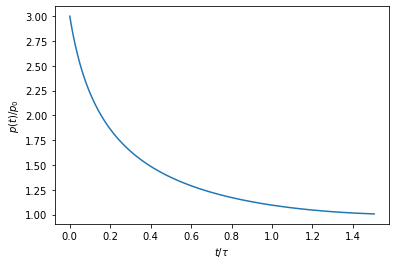

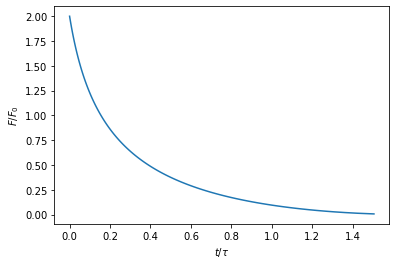

In [6]:
import numpy as np
import pylab as plt


p1 = (2.0+1.0)*1.0e5 # initial pressure / Pa
y0 = p0 / p1

def get_x(y):
    C = np.arcsin(y0) - np.sqrt(y0*(1-y0))
    return np.arcsin(y) - np.sqrt(y*(1-y)) - C

npoints = 100
dy = (1.0-y0) / npoints
y_data = np.arange(y0, 1.0, dy)
x_data = [get_x(y) for y in y_data]
yinv_data = [1.0/y for y in y_data]

#plt.plot(x_data, y_data)
#plt.xlabel(r'$t/\tau$')
#plt.ylabel(r'$p_0/p(t)$')
#plt.show()


plt.plot(x_data, yinv_data)
plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$p(t)/p_0$')
plt.show()

F_data = [(1-y)/y for y in y_data]
plt.plot(x_data, F_data)
plt.xlabel(r'$t / \tau$')
plt.ylabel(r'$F/F_0$')
plt.show()

## Question 2

A pollutant species is found to undergo a first order decomposition
reaction, where the rate of decay of its concentration $c$ is
proportional
\begin{align*}
  \frac{dc}{dt} = - k c
\end{align*}
where $k$ is a rate constant that has the units of inverse time.
Experimental measurements on the system are given in the table below:

    
|  $t / {\rm s}$ |$0     $|$ 10    $|$ 20    $|$ 30    $|$ 40$    |
| :-- | --: | --: | --: | --: | --: |
|  $c / {\rm M}$ |$0.167 $|$ 0.126 $|$ 0.095 $|$ 0.072 $|$ 0.054$ |



1. Determine how the concentration of the pollutant species is expected to vary with time (i.e. find the function $c(t)$).  Assume that the concentration of the species at time $t=0$ is $c_0$.

2. Graph the experimental data in the table above in a form to
  obtain a linear relation that can be used to obtain an estimate for
  $k$ (Hint: Use a semilog plot).
  
3. A $0.2\,{\rm M}$ solution is fed to a tubular reactor of inner
  radius $R=1\,{\rm mm}$ and length $L=1\,{\rm m}$.  The velocity profile
  within the reactor is given by
  \begin{align*}
    v(r) &= 2v_0\left(1-\frac{r^2}{R^2}\right)
  \end{align*}
  where $r$ is the distance from the center-line of the tube, and
  $v_0=1\,{\rm cm\,s}^{-1}$.  Determine the (mean) concentration of
  the solution that exits the reactor.  (Hint: First determine the
  concentration profile across the cross-section of the exiting plane
  of the reactor and then use the trapezoid rule to estimate the
  average).
  


## Model solution for Q2

### Part 1:

This is a simple separable differential equation, which we solve by first multiplying both sides of the equation by $dt$ and then isolating variables:
\begin{align*}
dc &= - kcdt
\\
\frac{dc}{c} &= -k dt
\\
\ln c &= -k t + C
\end{align*}
where $C$ is an unknown integration constant, which can be determined from the initial condition (i.e. $c(0)=c_0$).  From this, we find
\begin{align*}
\ln c_0 &= -k (0) + C
\\
C &= \ln c_0
\end{align*}
Substituting this back into the solution for the differential equation, we arrive at:
\begin{align*}
\ln c(t) &= -k t + \ln c_0
\\
c(t) &= c_0 e^{-k t}.
\end{align*}


### Part 2:

From our expression for the variation of the pollutant concentration with time, we find:
\begin{align*}
\ln c(t) &= \ln c_0 - k t
\end{align*}
This means that if we plot the logarithm of the pollutant concentration with time, this should yield a straight line with intercept $\ln c_0$ and slope $-k$.  Let's plot the concentration of the pollutant  against time on a semilog plot.

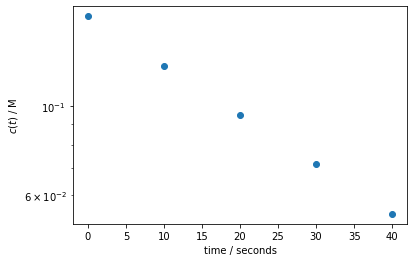

In [16]:
import pylab as plt

t_data = [0     , 10    , 20    , 30    , 40    ]
c_data = [0.167 , 0.126 , 0.095 , 0.072 , 0.054 ]

plt.plot(t_data, c_data, 'o')

plt.xlabel('time / seconds')
plt.ylabel('$c(t)$ / M')
plt.yscale('log')

plt.show()

This looks suspiciously linear... must be a setup.  In any case, we can try to fit a line through these data to find a value for the reaction rate constant $k$:


In [17]:
from scipy.stats import linregress

lnc_data = [np.log(c) for c in c_data]

slope, intercept, r_value, p_value, std_err = linregress(t_data, lnc_data)
k = -slope
print(f'k = {k} s^{-1}')

k = 0.028176353196403853 s^-1


### Part 3:

The concentration of pollutant decreases with time.  The time that a solution spends in the reactor depends on $r$, its distance from the center of the pipe.  This time is equal to $t=L/v(r)$, where $L$ is the length of the reactor.  The corresponding exit concentration is then $c(t)=c_0e^{-kL/v(r)}$, which is the concentration profile exiting the pipe.  So then this allows us to get the concentration profile of the pollutant across the pipe at its exit:
\begin{align*}
c(r) &= c_0e^{-kL/v(r)}
.
\end{align*}






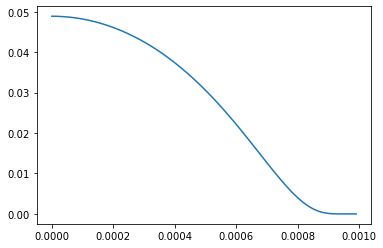

In [18]:
import numpy as np
import pylab as plt

def v(r):
    v0 = 1.0e-2
    x = r/R
    return 2.0*v0*(1.0-x**2)

def c(r):
    c0 = 0.2
    L = 1.0
    t = k*L/v(r)
    #print(t)
    return c0*np.exp(-t)

R = 1.0e-3
npoints = 100.0
dr = R / npoints
r_data = np.arange(0.0, R, dr)
c_data = [c(r) for r in r_data]


plt.plot(r_data, c_data)
plt.show()

## Question 3

Solve the following differential equations:

1.
  $\displaystyle
    \frac{dy}{dx} = \frac{y}{x} + \tan\left(\frac{y}{x}\right)
  $
  
2.
  $\displaystyle
    \frac{dy}{dx} = \frac{x+y}{x-y}
  $
  
3.
  $\displaystyle 
\frac{dy}{dx} = \frac{y(x+y)}{x(x-y)}
  $
  
4.
  $\displaystyle
\frac{dy}{dx} = \frac{2y}{x} + \frac{x}{y}
  $
  where $y(1)=2$.  Plot a comparison between your analytical solution and a numerical solution.


## Model solution for Q3

All these equations are "homogeneous" first order differential equations, which are of the general form
\begin{align*}
\frac{dy}{dx} &= f\left(\frac{y}{x}\right)
\end{align*}
The method to solve these is to make the substitution:
\begin{align*}
v(x) &= \frac{y(x)}{x},
\end{align*}
which implies 
\begin{align*}
y(x) &= 
\\
\frac{dy}{dx} &= v(x) + x\frac{dv}{dx}.
\end{align*}
This then leads to
\begin{align*}
v(x) + x\frac{dv}{dx} &= f(v)
\\
\frac{1}{f(v)-v} \frac{dv}{dx} &= \frac{1}{x}
\end{align*}
which is separable:
\begin{align*}
\frac{dv}{f(v)-v} &= \frac{dx}{x}
.
\end{align*}

### Part 1:

In this case, we find
\begin{align*}
f(v) &= v + \tan v
\\
f(v) - v &= \tan v
\end{align*}
We then need to integrate
\begin{align*}
\frac{dv}{\tan v} &= \frac{dx}{x}
\\
\ln |\sin v| &= \ln |x| + C
\\
\ln \left|\sin\frac{y(x)}{x}\right| &= \ln|x| + C
\end{align*}

### Part 2:

In this case, we find
\begin{align*}
f(v) &= \frac{1+v}{1-v}
\\
f(v) - v &= \frac{1+v}{1-v} - v 
= \frac{1+v - (1-v)v}{1-v}
= \frac{1-v^2}{1-v} = 1+v
\end{align*}
We then need to integrate
\begin{align*}
\frac{dv}{1+v} &= \frac{dx}{x}
\\
\ln |1+v| &= \ln |x| + C
\\
\ln \left|1+\frac{y(x)}{x}\right| &= \ln|x| + C
\\
\left|1+\frac{y(x)}{x}\right| &= |x| e^C
\end{align*}

### Part 3:

In this case, we find
\begin{align*}
f(v) &= v + \frac{v(1+v)}{1-v}
\\
f(v) - v &= \frac{v(1+v)}{1-v} -v
=  \frac{v(1+v)-v(1-v)}{1-v}
= \frac{2v^2}{1-v}
\end{align*}
We then need to integrate
\begin{align*}
(1-v)\frac{dv}{2v^2} &= \frac{dx}{x}
\\
\frac{1}{2}(-v^{-1} - \ln|v|) &= \ln |x| + C
\\
-\frac{x}{y} - \ln \left|y(x)\right| &=  C
\end{align*}

### Part 4:

In this case, we find
\begin{align*}
f(v) &= 2v + v^{-1}
\\
f(v) - v &= v + v^{-1}
\end{align*}
We then need to integrate
\begin{align*}
\frac{dv}{v+v^{-1}} &= \frac{dx}{x}
\\
\frac{vdv}{v^2+1} &= \frac{dx}{x}
\\
\frac{1}{2}\ln |v^2+1| &= \ln |x| + C
\\
\frac{1}{2}\ln \left|(y/x)^2+1\right| &= \ln|x| + C
\end{align*}
Using the initial condition $y(1)=2$, we find
\begin{align*}
\frac{1}{2}\ln \left|(2/1)^2+1\right| &= \ln|1| + C
\\
C &= \frac{1}{2}\ln 5 .
\end{align*}
Finally, we get
\begin{align*}
\frac{1}{2}\ln \left|(y/x)^2+1\right| &= \ln|x| + \frac{1}{2}\ln 5
\\
\ln \left|(y/x)^2+1\right| &= 2\ln|x| + \ln 5
\\
(y/x)^2 + 1 &= 5 x^2
\\
y(x) &= x(5x^2-1)^{1/2}.
\end{align*}


In [2]:
x_data = [1.0]
y_data = [2.0]


dx = 0.01
xmax = 5.0
nsteps = int((xmax-1.0)/dx)

xold = 1.0
yold = 1.0
for step in range(nsteps):
    xnew = xold + dx
    ynew = yold + (2*yold/xold+xold/yold)*dx
    x_data.append(xnew)
    y_data.append(ynew)
    xold = xnew
    yold = ynew

    
import pylab as plt


plt.plot(x_data, y_data, 'o', label='numerical')

y_analytical = [x*np.sqrt(5*x*x-1) for x in x_data]
plt.plot(x_analytical, y_analytical, label='analytical')

plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

ModuleNotFoundError: No module named 'pylab'